<a href="https://colab.research.google.com/github/mhkarimid/Bioox-/blob/main/Final-second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.5"
export JULIA_PKG_PRECOMPILE_AUTO=0
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  echo "Installing PyCall.jl..."
  julia -e 'using Pkg; Pkg.add("PyCall"); Pkg.build("PyCall")'
  julia -e 'println("Success")'

fi

Installing Julia 1.8.5 on the current Colab Runtime...
2023-03-18 01:25:39 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz [130873886/130873886] -> "/tmp/julia.tar.gz" [1]
Installing PyCall.jl...
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Preferences ───── v1.3.0
   Installed VersionParsing ── v1.3.0
   Installed Conda ─────────── v1.8.0
   Installed JSON ──────────── v0.21.3
   Installed MacroTools ────── v0.5.10
   Installed Parsers ───────── v2.5.8
   Installed PyCall ────────── v1.95.1
   Installed SnoopPrecompile ─ v1.0.3
    Updating `~/.julia/environments/v1.8/Project.toml`
  [438e738f] + PyCall v1.95.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [8f4d0f93] + Conda v1.8.0
  [682c06a0] + JSON v0.21.3
  [1914dd2f] + MacroTools v0.5.10
  [69de0a69] + Parsers v2.5.8
  [21216c6a] + Preferences v1.3.0
  [438e738f] + 

In [3]:
%pip install -Uq pysr pytorch_lightning
from julia import Julia

julia = Julia(compiled_modules=False, threads='auto')
from julia import Main
from julia.tools import redirect_output_streams

redirect_output_streams()
import pysr

# We don't precompile in colab because compiled modules are incompatible static Python libraries:
pysr.install(precompile=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.8 MB/s eta 0:00:00
Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 20.04.5 LTS
  uname: Linux 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  2200 MHz    

[ Info: Julia version info
[ Info: Julia executable: /usr/local/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /usr/bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.9.so.1.0
│ Python:
│     python: /usr/bin/python3
└     libpython: 
     Cloning git-repo `https://github.com/MilesCranmer/SymbolicRegression.jl`
     Cloning git-repo `https://github.com/JuliaParallel/ClusterManagers.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed RealDot ────────────────────────── v0.1.0
   Installed IRTools ────────────────────────── v0.4.8
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed DynamicPolynomials ─────────────── v0.4.6
   Installed GPUArraysCore ──────────────────── v0.1.4
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed IrrationalConstants ────────────── v0.2.2
   Installed AutoH

In [4]:
import sympy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/mhkarimid/Data/main/newdata.csv', 
               names=['Time (min)', 'Gold grade (g/ton)', 'Pyrite content (wt.%)',
               'Ore content (wt.%)', 'pH', 'ORP (mV)', 'D-Gal (wt.%)',
               'D-Suc (wt.%)', 'D-FrU (wt.%)', 'Ferric (g/lit)', 'Pyrite dissolution (%)'])
df.head()

,Time (min),Gold grade (g/ton),Pyrite content (wt.%),Ore content (wt.%),pH,ORP (mV),D-Gal (wt.%),D-Suc (wt.%),D-FrU (wt.%),Ferric (g/lit),Pyrite dissolution (%)
0,-0.500000,0.5,0.5,-0.444444,-0.191734,-0.460602,-0.155844,-0.155844,-0.155844,-0.177262,-0.339150
1,-0.456522,0.5,0.5,-0.444444,-0.201303,-0.443605,-0.155844,-0.155844,-0.155844,-0.161934,-0.323117
2,-0.413043,0.5,0.5,-0.444444,-0.244366,-0.432274,-0.155844,-0.155844,-0.155844,-0.165186,-0.327591
3,-0.369565,0.5,0.5,-0.444444,-0.273074,-0.304795,-0.155844,-0.155844,-0.155844,-0.131744,-0.278188
4,-0.326087,0.5,0.5,-0.444444,-0.225227,-0.214143,-0.155844,-0.155844,-0.155844,-0.118739,-0.251342


In [6]:

gg=np.sqrt(df['Time (min)']**2+
            df['Gold grade (g/ton)']**2+
            df['Pyrite content (wt.%)']**2+
            df['Ore content (wt.%)']**2+
            df['pH']**2+\
            df['ORP (mV)']**2+
            df['D-Gal (wt.%)']**2+
            df['D-Suc (wt.%)']**2+
            df['D-FrU (wt.%)']**2)
    
df['Time (min)']=df['Time (min)']/gg
df['Gold grade (g/ton)']=df['Gold grade (g/ton)']/gg
df['Pyrite content (wt.%)']=df['Pyrite content (wt.%)']/gg
df['Ore content (wt.%)']=df['Ore content (wt.%)']/gg
df['pH']=df['pH']/gg
df['ORP (mV)']=df['ORP (mV)']/gg
df['D-Gal (wt.%)']=df['D-Gal (wt.%)']/gg
df['D-Suc (wt.%)']=df['D-Suc (wt.%)']/gg
df['D-FrU (wt.%)']=df['D-FrU (wt.%)']/gg

def sig(x):
 return 1/(1 + np.exp(-x))
 

df=sig(df)
df.head()

,Time (min),Gold grade (g/ton),Pyrite content (wt.%),Ore content (wt.%),pH,ORP (mV),D-Gal (wt.%),D-Suc (wt.%),D-FrU (wt.%),Ferric (g/lit),Pyrite dissolution (%)
0,0.390836,0.609164,0.609164,0.402637,0.457557,0.399193,0.465473,0.465473,0.465473,0.455800,0.416016
1,0.397959,0.611448,0.611448,0.400586,0.454491,0.400769,0.464729,0.464729,0.464729,0.459605,0.419916
2,0.406363,0.612734,0.612734,0.399431,0.444174,0.402113,0.464309,0.464309,0.464309,0.458797,0.418827
3,0.411799,0.618307,0.618307,0.394420,0.434517,0.427013,0.462484,0.462484,0.462484,0.467112,0.430898
4,0.418112,0.624058,0.624058,0.389243,0.443173,0.445947,0.460590,0.460590,0.460590,0.470350,0.437493


In [72]:
XX=df.drop(['Gold grade (g/ton)','Ferric (g/lit)','Pyrite dissolution (%)'], axis=1)
yy=df['Ferric (g/lit)']

Rtr=[]
RMSEtr=[]

Rte=[]
RMSEte=[]

MODEL=[]

for i in range(1,19):
    X_tr, X_te, y_tr, y_te = train_test_split(XX, yy, test_size=0.05*i)
    X = X_tr.values.tolist()
    y = y_tr.transpose().values.tolist()
    Xte = X_te.values.tolist()
    yte = y_te.transpose().values.tolist()
    default_pysr_params = dict(
        populations=10,
        model_selection="accuracy",
        loss="L1DistLoss()",
        maxsize=30,
        precision=16,
    )
    model = PySRRegressor( 
        niterations=30,
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["exp","sinh", "cosh"],
        **default_pysr_params
    )
    model.fit(X, y)

    MODEL.append(model)
    y2=model.predict(Xte)
    
    dk=pd.DataFrame(data=[yte,y2])
    d=dk.transpose().corr()[1]
    SS=d.squeeze()[0]
    Rte.append(SS)
    rmse=(mean_squared_error(yte, y2))
    RMSEte.append(rmse)  
    
    y3=model.predict(X)
    dk=pd.DataFrame(data=[y,y3])
    d=dk.transpose().corr()[1]
    SS=d.squeeze()[0]
    Rtr.append(SS)
    rmse=(mean_squared_error(y, y3))
    RMSEtr.append(rmse)
    
    


/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.440e+03
Head worker occupation: 0.1%
Progress: 4 / 300 total iterations (1.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.461e-02  1.046e-01  0.486
7           3.391e-02  3.454e-03  (x0 / (sinh(x0) + sinh(0.4631)))
10          3.149e-02  2.465e-02  (x0 / (x0 + (x0 / (x0 + sinh(0.4917)))))
11          2.859e-02  9.682e-02  (x0 / (sinh(x0) + (x0 / (x4 + sinh(0.4917)))))
13          2.837e-02  3.922e-03  (x0 / (sinh(x0) + ((x0 / (x4 + sinh(0.4917))) + 0.01316)))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.620e+03
Head worker occupation: 0.3%
Progress: 16 / 300 total iterations (5.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.461e-02  1.046e-01  0.486
6           3.290e-02  1.011e-02  exp(sinh(x4 - cosh(x4)))
7           3.003e-02  9.146e-02  exp(sinh(sinh(x4 - cosh(x4))))
9           2.7

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.010e+03
Head worker occupation: 0.4%
Progress: 9 / 300 total iterations (3.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.476e-02  1.041e-01  0.4868
7           3.470e-02  3.258e-04  (0.4927 + ((0.008064 / x4) * -1.213))
10          2.910e-02  5.876e-02  exp(0.8496 - (cosh(0.813 - sinh(x1)) - -0.5054))
14          2.322e-02  5.631e-02  sinh(sinh(exp(x3 * sinh(x0 * 0.763))) / (exp(1.32) - x1))
25          2.246e-02  3.024e-03  sinh(sinh(exp(x0 * sinh(sinh((x4 / 1.302) * sinh(0.7856)) * x3))) / ((exp(1.32) - x1) - (x1 * sinh(0.7856))))
26          2.222e-02  1.080e-02  sinh(sinh(exp(x0 * sinh(sinh(sinh((x4 / 1.302) * sinh(0.7856))) * x3))) / ((exp(1.32) - x1) - (x1 * sinh(0.7856))))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.890e+03
Head worker occupation: 0.3%
Progress: 17 / 300 total iterations (5.667%)
Hall of Fame:
-------------------------------------

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 2.270e+03
Head worker occupation: 0.1%
Progress: 7 / 300 total iterations (2.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.470e-02  1.011e-01  0.4863
6           3.122e-02  2.109e-02  exp((x0 * x1) + -0.908)
7           2.260e-02  3.235e-01  exp(sinh((x0 * x1) + -0.908))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 2.440e+03
Head worker occupation: 0.1%
Progress: 15 / 300 total iterations (5.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.470e-02  1.011e-01  0.4863
6           3.122e-02  2.109e-02  exp((x0 * x1) + -0.908)
7           2.260e-02  3.235e-01  exp(sinh((x0 * x1) + -0.908))
13          2.190e-02  5.291e-03  exp((sinh(sinh(sinh(sinh(sinh(x1)))) * x4) * 0.594) + -0.908)
14          1.997e-02  9.200e-02  sinh(exp(((sinh(sinh(x1)) * exp(x2 + -0.908)) * x0) + -0.908))
18          1.70

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 6.280e+02
Head worker occupation: NaN%
Progress: 2 / 300 total iterations (0.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.574e-02  8.116e-02  0.4932
2           3.546e-02  7.843e-03  sinh(0.4724)
22          2.911e-02  9.874e-03  (((x1 / 1.324) + sinh(x3 + ((x4 / cosh(sinh(exp(sinh(x3))) - -0.1235)) * (x4 + x4)))) / 1.92)
23          2.794e-02  4.137e-02  (((x1 / 1.324) + sinh(x3 + ((x4 / cosh(sinh(exp(sinh(sinh(x3)))) - -0.1235)) * (x4 + x4)))) / 1.92)
25          2.625e-02  3.123e-02  (((x1 / 1.324) + (x3 + ((((-0.0134 / exp(x3)) + x4) / cosh(sinh(exp(x3)) - -0.1235)) * (x4 + x4)))) / 1.92)
29          2.536e-02  8.568e-03  (((x1 / 1.324) + (x3 + ((((-0.0134 / exp(exp(x3))) + x4) / (cosh(sinh(exp(sinh(x3))) - -0.1235) + -1.053)) * (x4 + x4)))) / 1.92)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 1.990e+03
Head worker occupation: 0.2%
Progress: 12 / 300 tot

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.170e+02
Head worker occupation: 0.0%
Progress: 1 / 300 total iterations (0.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.202e-01  -1.163e+00  0.617
3           1.157e-01  1.942e-02  (0.617 - 0.0049)
4           6.421e-02  5.885e-01  (x5 / cosh(-0.02866))
5           6.152e-02  4.290e-02  ((x5 - 0.0049) + 0.02608)
9           3.589e-02  1.347e-01  ((0.617 - 0.0049) + (0.02608 / (0.2103 - x4)))
11          2.357e-02  2.102e-01  ((0.617 - 0.0049) + ((0.02608 / (0.02608 - x4)) / x1))
16          2.344e-02  1.175e-03  ((0.617 - 0.0049) + ((0.02608 / ((0.02608 - x4) + sinh(0.0049 / x3))) / x1))
21          2.339e-02  3.910e-04  ((0.617 - (0.0049 * cosh(x3 + x5))) + (sinh(0.02608 / ((0.02608 - x4) - sinh(sinh(-0.005707)))) / x1))
22          2.336e-02  1.466e-03  ((0.617 - (0.0049 * sinh(cosh(x4)))) + (sinh(sinh(0.02608 / ((0.02608 - x4) - sinh(sinh(sinh(-0.005707)))))) / x1))

Press 'q' and

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.000e+03
Head worker occupation: 0.9%
Progress: 3 / 300 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.558e-02  9.796e-02  0.487
14          3.448e-02  2.403e-03  exp(sinh(sinh(-0.1243 / (cosh(x0) - exp(-0.1243 - x3)))) - x3)
15          3.439e-02  2.444e-03  exp(sinh(sinh(sinh(-0.1243 / (cosh(x0) - exp(-0.1243 - x3))))) - x3)
16          3.387e-02  1.525e-02  exp(sinh(-0.1243 / (sinh(cosh(x3)) - exp((-0.1243 - x3) * x2))) - x3)
17          3.040e-02  1.082e-01  exp((-0.1243 / (sinh(cosh(x4)) - exp(((x4 * -0.1613) - x2) * x2))) - x3)
19          2.965e-02  1.236e-02  exp((-0.1243 / (sinh(cosh(x4)) - exp((((x4 - x1) * x6) - x2) * x2))) - x3)
22          2.954e-02  1.141e-03  exp(sinh(sinh(sinh(-0.1243 / (sinh(cosh(x4)) - exp(sinh(sinh(-0.4697 - x2) * (x4 * x2))))))) - x3)
23          2.907e-02  1.624e-02  exp(sinh(-0.1243 / (sinh(cosh(x4)) - exp(sinh((sinh(-0.2251) - 

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.920e+03
Head worker occupation: 0.4%
Progress: 6 / 300 total iterations (2.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.488e-02  1.061e-01  0.4863
5           3.412e-02  5.554e-03  (0.559 - (x3 * 0.1404))
8           3.293e-02  1.176e-02  exp(cosh(sinh(x1 - 0.7446)) / -1.382)
11          3.287e-02  6.517e-04  exp(cosh((0.2825 / x1) * (x1 - 0.7446)) / -1.382)
13          3.241e-02  7.131e-03  exp(cosh(((0.2825 / x1) * (x1 - 0.7446)) * -1.144) / -1.382)
14          3.238e-02  9.770e-04  exp(cosh(sinh(sinh(0.2825) / x1) * sinh(x1 - 0.7446)) / -1.382)
16          3.198e-02  6.141e-03  exp(cosh(((0.2825 / sinh(x1)) * (x1 - 0.7446)) * sinh(sinh(-0.9795))) / -1.382)
17          2.933e-02  8.666e-02  exp(((exp((sinh(-1.111) / exp(x1)) + -0.0971) + sinh(-1.111)) / exp(x1)) + -0.0971)
19          2.744e-02  3.331e-02  exp((((0.7314 - exp((sinh(-1.111) / exp(x1)) + -0.0971)) + sinh(-1.111)) / e

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.530e+03
Head worker occupation: 0.4%
Progress: 5 / 300 total iterations (1.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.510e-02  1.071e-01  0.4863
6           3.400e-02  6.350e-03  (cosh(x4 - 0.4172) * 0.4888)
9           3.366e-02  3.271e-03  sinh(0.461 + ((0.0263 * x1) * sinh(x4)))
10          3.354e-02  3.424e-03  sinh(0.461 + ((0.0263 * sinh(x1)) * sinh(x4)))
12          3.256e-02  1.487e-02  (cosh((cosh(sinh(x3)) + x2) * (x4 - 0.4172)) * 0.4888)
13          3.241e-02  4.895e-03  (cosh((sinh(cosh(sinh(x3))) + x2) * (x4 - 0.4172)) * 0.4888)
14          3.180e-02  1.923e-02  (cosh(((cosh(sinh(x3)) + x2) + x2) * (x4 - 0.4172)) * 0.4888)
16          3.104e-02  1.211e-02  (cosh(((cosh(sinh(sinh(sinh(x1)))) + x2) + x2) * (x4 - 0.4172)) * 0.4888)
17          3.081e-02  7.351e-03  (cosh((((cosh(x2) * x6) + (x2 / x7)) + x1) * (x4 - 0.4172)) * 0.4888)
19          2.885e-02  3.279e-02  (cos

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.230e+03
Head worker occupation: 0.1%
Progress: 4 / 300 total iterations (1.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.421e-02  1.049e-01  0.4858
5           3.113e-02  2.367e-02  (0.5366 - (0.02042 / x1))
8           3.032e-02  8.740e-03  (0.5366 - (sinh(0.03394 / x1) + -0.010284))
9           2.908e-02  4.137e-02  (0.5366 - (((0.02042 / 0.683) / x1) + -0.010284))
10          2.887e-02  7.351e-03  (0.5366 - (((0.02042 / 0.683) / sinh(x1)) + -0.010284))
12          2.882e-02  7.330e-04  (0.5366 - (((0.02042 / 0.683) / sinh(sinh(x1))) + sinh(-0.010284)))
14          2.853e-02  5.153e-03  (0.5366 - (((0.02042 / 0.683) / x1) + (-0.010284 * (sinh(x0) - -0.5464))))
18          2.415e-02  4.161e-02  sinh(sinh(sinh(-0.05566 / exp(x2)) / ((sinh(x4) + -0.58) + sinh(sinh(x1)))) + 0.543)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 3.510e+03
Head worker occupation: 

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.420e+03
Head worker occupation: 0.5%
Progress: 10 / 300 total iterations (3.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.452e-02  9.603e-02  0.4863
15          3.439e-02  2.446e-04  sinh(((cosh(((1.871 - x5) + x3) * 0.457) * -0.06683) + 0.939) * 0.554)
17          3.223e-02  3.253e-02  sinh(((cosh(((0.02406 - x2) + (x3 - 2.746)) * 0.5635) * 0.2125) + 0.561) * 0.4421)
18          2.646e-02  1.975e-01  (((sinh((0.2002 - sinh(x2)) / -5.258) + 0.3535) * 0.7974) + (sinh(x4 * 0.26) - -0.0403))
24          2.589e-02  3.620e-03  (((sinh((0.2002 - sinh(x2)) / (-4.152 - exp(sinh(x2 - 0.01138)))) + 0.3535) * 0.7974) + (sinh(x4 * 0.263) - -0.0403))
25          2.588e-02  4.884e-04  (((sinh((0.2002 - sinh(x2)) / (-4.152 - exp(sinh(x2 - 0.01138)))) + 0.3535) * 0.7974) + sinh(sinh(x4 * 0.26) - -0.0403))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.380e+03
Head worker o

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 3.240e+03
Head worker occupation: 0.6%
Progress: 11 / 300 total iterations (3.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.513e-02  1.031e-01  0.4863
5           3.308e-02  1.497e-02  (0.506 - (0.012054 / x1))
12          2.158e-02  6.103e-02  (cosh(sinh(sinh(sinh(sinh(x4)) * x1)) / -0.6133) / 2.283)
20          1.958e-02  1.217e-02  ((((x0 * ((x1 * 0.4219) * x1)) * exp(((x0 - 2.082) + x2) + x4)) / x5) + 0.4326)
24          1.828e-02  1.718e-02  (cosh((sinh(exp((1.138 - x2) / (-1.502 - exp(x2)))) * sinh(sinh(sinh(sinh(x4))) * sinh(x1))) / -0.6133) / 2.283)
25          1.730e-02  5.469e-02  (cosh((sinh(exp((1.138 - x2) / (-0.9126 - cosh(exp(x2))))) * sinh(sinh(sinh(sinh(x4))) * sinh(x1))) / -0.6133) / 2.283)
28          1.627e-02  2.065e-02  (cosh((sinh(exp((1.349 - x2) / (sinh(-0.364 - x2) - sinh(sinh(exp(x2)))))) * sinh(sinh(sinh(x4)) * sinh(x1))) / -0.6133) / 2.283)

Press 'q' and th

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 4.720e+03
Head worker occupation: 0.4%
Progress: 14 / 300 total iterations (4.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.540e-02  8.428e-02  0.4888
5           3.485e-02  3.937e-03  (0.512 + (-0.02031 / x1))
6           3.108e-02  1.142e-01  sinh(0.512 + (-0.02031 / x1))
7           3.026e-02  2.672e-02  sinh(sinh(0.5273 - (0.03482 / x0)))
8           3.003e-02  7.351e-03  sinh(sinh(cosh(sinh(sinh(x4))) * 0.389))
9           2.933e-02  2.372e-02  sinh(0.5273 - (0.03482 / sinh(sinh(sinh(x1)))))
10          2.838e-02  3.276e-02  sinh(0.5273 - (0.03482 / sinh(sinh(sinh(sinh(x1))))))
11          2.756e-02  2.923e-02  sinh(0.594 - (0.2178 / exp(sinh(sinh(sinh(sinh(x1)))))))
14          1.750e-02  1.512e-01  sinh(sinh(cosh(exp(x1 - (0.2052 / x2)) * sinh(x4)) * 0.389))
18          1.455e-02  4.612e-02  sinh(sinh(cosh(sinh(exp(sinh(sinh(sinh(x1)) - sinh(0.2067 / x2))) * x4)) * 0.389))
26    

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 2.810e+03
Head worker occupation: 0.4%
Progress: 8 / 300 total iterations (2.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.479e-02  1.119e-01  0.4844
7           3.400e-02  3.869e-03  (0.502 / cosh(x5 / exp(x0)))
8           3.143e-02  7.817e-02  exp(((x3 * x0) - 0.4666) - x3)
9           3.081e-02  2.022e-02  (cosh(sinh((x3 - x2) + -0.1791)) - 0.5293)
13          2.298e-02  7.323e-02  (exp(-1.565) * (sinh(sinh((sinh(-0.2161) / x4) + x1)) - -2.31))
14          2.289e-02  3.914e-03  (exp(-1.565) * (sinh(sinh((sinh(sinh(-0.2161)) / x4) + x1)) - -2.31))
23          2.280e-02  4.349e-04  (exp(-1.565) * ((cosh(-1.177 * exp((x4 * x2) - 2.453)) * (sinh(sinh(sinh(-0.2161)) / x4) + x1)) - -2.31))
24          2.164e-02  5.212e-02  ((sinh(cosh(exp(x4) * sinh(exp((x2 + x2) - (2.453 - x5)))) * ((-0.2178 / x4) + x1)) - -2.31) * 0.209)
27          1.956e-02  3.353e-02  ((sinh((exp(x4) * sinh(exp(sinh(

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 4.670e+03
Head worker occupation: 0.6%
Progress: 13 / 300 total iterations (4.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.610e-02  7.724e-02  0.478
5           3.543e-02  4.682e-03  ((0.682 * 0.7607) - 0.0319)
7           3.433e-02  1.587e-02  sinh(exp(-0.06433 / x2) * 0.541)
10          2.248e-02  1.411e-01  sinh(sinh(0.3665 - sinh((x1 * -0.3608) * x4)))
18          1.909e-02  2.044e-02  sinh(sinh(0.3665 - sinh((x1 * sinh(-0.878 / ((0.3665 / sinh(x2)) + 1.814))) * x4)))
24          1.811e-02  8.772e-03  sinh(sinh(0.3665 - sinh((x1 * sinh(-0.878 / (((0.3665 - (sinh(x2 / -1.797) * -0.3218)) / x2) + 1.814))) * x4)))
26          1.685e-02  3.619e-02  sinh(sinh(0.3599 - sinh((x1 * sinh(-0.8755 / (((0.3691 - (((x2 / -1.68) * -0.878) * x2)) / sinh(x2)) + 1.815))) * x4)))
29          1.659e-02  5.249e-03  sinh(0.3665 - sinh((x1 * sinh(-0.878 / (((0.3665 - ((-0.878 * (x2 / (sinh(sinh(-0.7344)

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 5.280e+03
Head worker occupation: 1.5%
Progress: 15 / 300 total iterations (5.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.329e-02  1.010e-01  0.484
5           2.615e-02  6.031e-02  (cosh(x1) / exp(0.8433))
6           2.574e-02  1.575e-02  (cosh(sinh(x1)) / exp(0.8433))
10          2.464e-02  1.085e-02  (cosh(x1 * cosh(x4 * x4)) / exp(0.8433))
11          2.458e-02  2.444e-03  (cosh(x1 * cosh(sinh(x4 * x4))) / exp(0.8433))
13          2.367e-02  1.891e-02  (cosh(x1 * cosh(sinh((x6 + x2) * x4))) / exp(0.8433))
15          2.116e-02  5.600e-02  exp(0.05963 - exp(((x4 * -0.356) * (exp(x4) * exp(0.589))) * x1))
16          1.668e-02  2.381e-01  exp(0.05963 - exp(((sinh(x4) * -0.356) * (exp(x4) * exp(x2))) * x1))
26          1.569e-02  6.142e-03  (cosh(((x1 * -0.9224) * cosh(sinh((x6 + (x2 * 1.183)) * sinh(sinh(x4) * (sinh(x4) + x0))))) * -0.919) / exp(0.8433))
28          1.544e-02  7.87

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 7.320e+03
Head worker occupation: 1.5%
Progress: 21 / 300 total iterations (7.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.522e-02  9.184e-02  0.4866
5           3.378e-02  1.034e-02  ((x0 * 0.04324) + 0.468)
6           3.275e-02  3.124e-02  sinh((x0 * 0.06573) + 0.437)
9           3.207e-02  6.907e-03  (sinh(sinh(0.5083) * 0.911) * (0.5083 + x1))
10          2.843e-02  1.208e-01  sinh(sinh(0.397 - (sinh(x1 + x1) * -0.0468)))
13          2.464e-02  4.769e-02  sinh(0.3782 - ((sinh(sinh(sinh(x0 + x1))) + 0.3782) * -0.03326))
14          2.451e-02  5.386e-03  sinh(0.3782 - ((sinh(sinh(sinh(x0 + x1))) + sinh(0.3782)) * -0.03326))
15          2.255e-02  8.294e-02  sinh(0.397 - ((sinh(sinh(sinh(x0 + x1))) + (x0 * 0.3782)) * -0.03326))
17          2.242e-02  2.938e-03  sinh(sinh(0.3782 - ((sinh(sinh(sinh(x0 + x1))) + (0.3782 * sinh(x3))) * -0.03326)))
18          2.036e-02  9.629e-02  sinh(s

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.250e+04
Head worker occupation: 0.9%
Progress: 35 / 300 total iterations (11.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.342e-02  9.987e-02  0.4834
5           2.544e-02  6.820e-02  ((x1 * 0.2515) + 0.3691)
7           2.539e-02  9.775e-04  (0.4294 - ((x1 * -0.2032) * x0))
8           2.431e-02  4.341e-02  (0.4294 - ((x1 * -0.2032) * sinh(x4)))
9           2.264e-02  7.081e-02  exp((x1 * (cosh(x0) * x0)) - 1.0)
11          2.020e-02  5.709e-02  (((x1 * 1.363) * (1.352 * (x4 * 0.2429))) + 0.3809)
19          1.985e-02  2.217e-03  sinh(exp((x4 * exp((x2 * sinh(x2)) - cosh(x1 + (-0.3638 / x1)))) - exp(-0.023)))
20          1.831e-02  8.082e-02  exp((x1 * exp(sinh((exp(x2) * x0) * 0.4282) - (cosh(x0 - 1.0) + -0.2566))) - 1.0)
27          1.802e-02  2.250e-03  (((((((x0 - ((((((0.2026 - x1) * x4) * x2) * x1) / 0.433) + 0.5376)) * x1) * x1) * x2) / x0) + 0.5146) * 0.944)
28          1.756

/usr/local/lib/python3.9/dist-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Cycles per second: 1.400e+04
Head worker occupation: 0.9%
Progress: 39 / 300 total iterations (13.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.226e-02  4.169e-02  0.4888
7           2.464e-02  4.483e-02  (((x4 + 2.19) + x1) * 0.1577)
10          2.379e-02  1.176e-02  ((((x4 * exp(-0.3457)) + 2.19) + x1) * 0.1577)
11          2.139e-02  1.060e-01  (((x1 + 2.19) + ((0.3872 + x1) * x4)) * 0.1583)
13          2.000e-02  3.357e-02  (((exp(-0.5835 / (cosh(x2) * x0)) + 1.601) + x1) * 0.2028)
18          1.930e-02  7.158e-03  (((x1 + 2.19) + sinh(((0.1583 * ((x2 - x0) - -2.605)) + x2) * x4)) * 0.1583)
19          1.927e-02  1.466e-03  (((x1 + 2.19) + sinh(((0.1583 * ((x2 - sinh(x0)) - -2.605)) + x2) * x4)) * 0.1583)
20          1.814e-02  6.038e-02  (((x1 + 2.19) + sinh((((x4 / cosh(0.999)) * (exp(0.8403) * x2)) + x7) * x4)) * 0.1583)
21          1.639e-02  1.017e-01  (((x4 / cosh(sinh(sinh((sinh(x1 / -1.712) + 

In [73]:
Results=pd.DataFrame(list(zip(RMSEtr, Rtr, RMSEte, Rte)), columns=['RMSE (training)', 
                                                               'Correlation factor (training)',
                                                              'RMSE (testing)', 
                                                               'Correlation factor (testing)'])

In [74]:
Results

,RMSE (training),Correlation factor (training),RMSE (testing),Correlation factor (testing)
0,0.000343,0.921901,0.000376,0.924148
1,0.000309,0.929485,0.000338,0.926545
2,0.000319,0.925764,0.000290,0.929878
3,0.000306,0.935760,0.000261,0.932607
4,0.000225,0.945349,0.000277,0.941404
5,0.000317,0.927953,0.000255,0.933335
6,0.000263,0.939953,0.000258,0.942366
7,0.000267,0.939177,0.000275,0.934070
8,0.000328,0.926301,0.000348,0.921015
9,0.000317,0.934474,0.000352,0.927255


In [75]:
Results.to_excel("SRGAResutls.xlsx") 

In [76]:
MODEL

[PySRRegressor.equations_ = [
 	    pick     score                                           equation  \
 	0         0.000000                                              0.486   
 	1         0.010074                                    exp(x1 - 1.168)   
 	2         0.214837                          (0.3774 - (x1 * -0.2261))   
 	3         0.000369                      (0.3774 - sinh(x1 * -0.2261))   
 	4         0.194737                   (0.4028 - ((x1 * -0.3374) * x4))   
 	5         0.014012             (0.4028 - ((x1 * -0.3374) * sinh(x4)))   
 	6         0.067304                  (((0.388 / x4) + (x1 * x2)) * x4)   
 	7         0.023148            (((0.388 / sinh(x4)) + (x1 * x2)) * x4)   
 	8         0.113867          (((0.4321 / x4) + ((x2 * x4) * x1)) * x4)   
 	9         0.040450  (((0.388 / x4) + ((x1 * x2) * 0.7593)) * sinh(...   
 	10        0.107948  sinh(((0.3977 / x4) + (x1 * (x2 * x1))) * sinh...   
 	11        0.028911  sinh(((0.4082 / x4) + ((x4 * sinh(sinh(x1))) *..

In [77]:
for i in range(17):
  print(MODEL[i].sympy())

sinh(sinh(sinh(0.761095558692264*x1*x4*(x1 + sinh(2*x1))*sinh(0.551 - 0.158/x4)*sinh(sinh(sinh(x2))) + 0.4001)))
sinh(sinh(0.354358610914245*sinh(exp(0.6514*x4**2*sinh(x1**2*x2*x4*(sinh(cosh(x2 + x7)) + 4.12))))))
0.436223740924659*exp(sinh(x1*sinh(sinh(sinh(x2)*sinh(exp(exp(-x4)*sinh(sinh(x1*(x0 + x4*exp(x3)) - 1.244))/x4))))))
sinh(sinh(x4*(exp(sinh(x6)) + sinh(x2*exp(x7)))*sinh(x2*x4)*sinh(x1**2*x4*cosh(x1))) + 0.429)
-(0.349 - sinh(x1))*(3.39904826648538*x2 + 3.39904826648538*x6*x7)*sinh(sinh(x2))/cosh(sinh(x4 - 1.469)/(x4 - 0.04245)) + 0.4536
0.457169984461824*exp(0.72134458630888*x2*(1.96850393700787*x4 + sinh(0.05176 - 0.3403/x1))*sinh(x1 + 1.64203612479475*x4 - 0.3403/x2))
0.456*cosh(sinh(x1*(x1*x6 + x4)*(x2*(x0 + x1*(-x1 + x2 + sinh(x7)) + x4) + x4))) - 0.011286
cosh((-x1*x2*(0.5 - x4)*(exp(exp(x6) + sinh(sinh(sinh(x7)))) - 0.2122) + x2)*sinh(sinh(x1))) - 0.547
0.06088*cosh(x1*(x2 + exp(sinh(x2*(0.62188505646502*exp(x7) + 0.3132))) + 2*cosh(x2))*sinh(x4)) + 0.373732384
0.1678*

In [78]:
MODEL[0].sympy()

sinh(sinh(sinh(0.761095558692264*x1*x4*(x1 + sinh(2*x1))*sinh(0.551 - 0.158/x4)*sinh(sinh(sinh(x2))) + 0.4001)))

In [79]:
MODEL[1].sympy()

sinh(sinh(0.354358610914245*sinh(exp(0.6514*x4**2*sinh(x1**2*x2*x4*(sinh(cosh(x2 + x7)) + 4.12))))))

In [80]:
MODEL[2].sympy()

0.436223740924659*exp(sinh(x1*sinh(sinh(sinh(x2)*sinh(exp(exp(-x4)*sinh(sinh(x1*(x0 + x4*exp(x3)) - 1.244))/x4))))))

In [81]:
MODEL[3].sympy()

sinh(sinh(x4*(exp(sinh(x6)) + sinh(x2*exp(x7)))*sinh(x2*x4)*sinh(x1**2*x4*cosh(x1))) + 0.429)

In [82]:
MODEL[4].sympy()

-(0.349 - sinh(x1))*(3.39904826648538*x2 + 3.39904826648538*x6*x7)*sinh(sinh(x2))/cosh(sinh(x4 - 1.469)/(x4 - 0.04245)) + 0.4536

In [83]:
MODEL[5].sympy()

0.457169984461824*exp(0.72134458630888*x2*(1.96850393700787*x4 + sinh(0.05176 - 0.3403/x1))*sinh(x1 + 1.64203612479475*x4 - 0.3403/x2))

In [84]:
MODEL[6].sympy()

0.456*cosh(sinh(x1*(x1*x6 + x4)*(x2*(x0 + x1*(-x1 + x2 + sinh(x7)) + x4) + x4))) - 0.011286

In [85]:
MODEL[7].sympy()

cosh((-x1*x2*(0.5 - x4)*(exp(exp(x6) + sinh(sinh(sinh(x7)))) - 0.2122) + x2)*sinh(sinh(x1))) - 0.547

In [86]:
MODEL[8].sympy()

0.06088*cosh(x1*(x2 + exp(sinh(x2*(0.62188505646502*exp(x7) + 0.3132))) + 2*cosh(x2))*sinh(x4)) + 0.373732384

In [87]:
MODEL[9].sympy()

0.1678*cosh(x1*x4/sinh(0.14220686950987*x2*(exp(x0) + sinh(x7*(x1 + x6)) + 0.1678) - 0.4804114)) + 0.266802

In [88]:
MODEL[10].sympy()

0.438020148926851*cosh(x1*x4*exp(x2*x4*(0.803858520900322*x1 - 0.803858520900322*x4 + 0.803858520900322*exp(x6) + 0.803858520900322*exp(x7))))

In [89]:
MODEL[11].sympy()

sinh(sinh(0.429877300613497*cosh(x4*exp(sinh(sinh((x2 + 0.1467 - 0.2925/(sinh(x1)*sinh(x4 + 0.0696*exp(x6))))/x4))))))

In [90]:
MODEL[12].sympy()

sinh(sinh(0.4214*exp(x2*sinh(sinh(x4*(x1*x7 + x1*cosh(x2 + cosh(sinh(x2))))*sinh(x4 - 0.1504/x1))))))

In [91]:
MODEL[13].sympy()

sinh(2.127*x1*x4**2*sinh(sinh(x2*(x2 + x7 + sinh(1.6750418760469*x1*x6))*sinh(x1*x4))) + 0.4238)

In [92]:
MODEL[14].sympy()

0.44762757385855*cosh(sinh(sinh(0.987*sinh(1.01988781234064*(x4 + sinh(sinh(sinh(x6*sinh(x0*x7)))))*sinh(x1)*sinh(x2 + x4)))))

In [93]:
MODEL[15].sympy()

0.1448*sinh(sinh(x4*(-13.2234594107376*(0.10592108 - 0.4841*x1)*sinh(x2)*sinh(1.437*x4) + 0.2084))) + 0.4165

In [94]:
MODEL[16].sympy()

x2*x4**2*(x2*x4 + sinh(cosh(sinh(x6))))*(3.67*x4*sinh(sinh(x1)) - 0.754919)*sinh(sinh(x2)) + 0.4634

In [95]:
MODEL[17].sympy()

x1*x2*(0.774965459743227*x1 + sinh(x2*(x6*x7 + sinh(sinh(x1*cosh(cosh(x5)))))))*(sinh(x4) - 0.3503) + 0.4448

In [106]:
X_tr, X_te, y_tr, y_te = train_test_split(XX, yy, test_size=0.05*2)
X = X_tr.values.tolist()
y = y_tr.transpose().values.tolist()
Xte = X_te.values.tolist()
y_te = y_te.transpose().values.tolist()

ytr=MODEL[5].predict(X)
yte=MODEL[5].predict(Xte)

Text(0, 0.5, 'Ferric concentration-model')

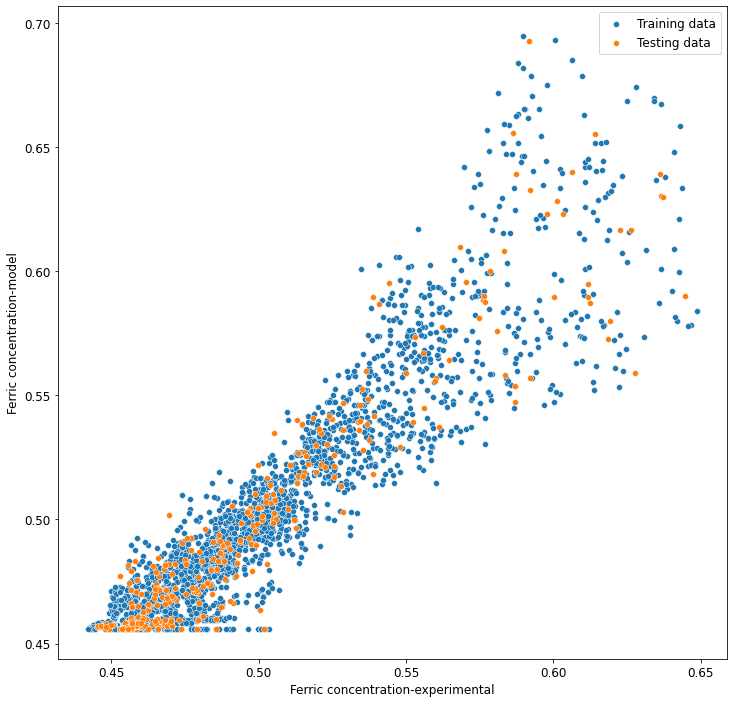

In [107]:
plt.figure(figsize=(12,12))
d=sns.scatterplot(x=ytr, y=y, legend='auto')
d=sns.scatterplot(x=yte, y=y_te,legend='auto')
d.legend(labels=["Training data","Testing data"],fontsize=12)
d.set(xlabel='Ferric concentration-exp', ylabel='Ferric concentration-model')
d.tick_params(labelsize=12)
d.set_xlabel('Ferric concentration-experimental',fontsize=12)
d.set_ylabel('Ferric concentration-model',fontsize=12)

In [105]:
X_tr, X_te, y_tr, y_te = train_test_split(XX, yy, test_size=0.05*2)
X = X_tr.values.tolist()
y = y_tr.transpose().values.tolist()
Xte = X_te.values.tolist()
y_te = y_te.transpose().values.tolist()

ytr=MODEL[7].predict(X)
yte=MODEL[7].predict(Xte)

Text(0, 0.5, 'Ferric (g/lit)-model')

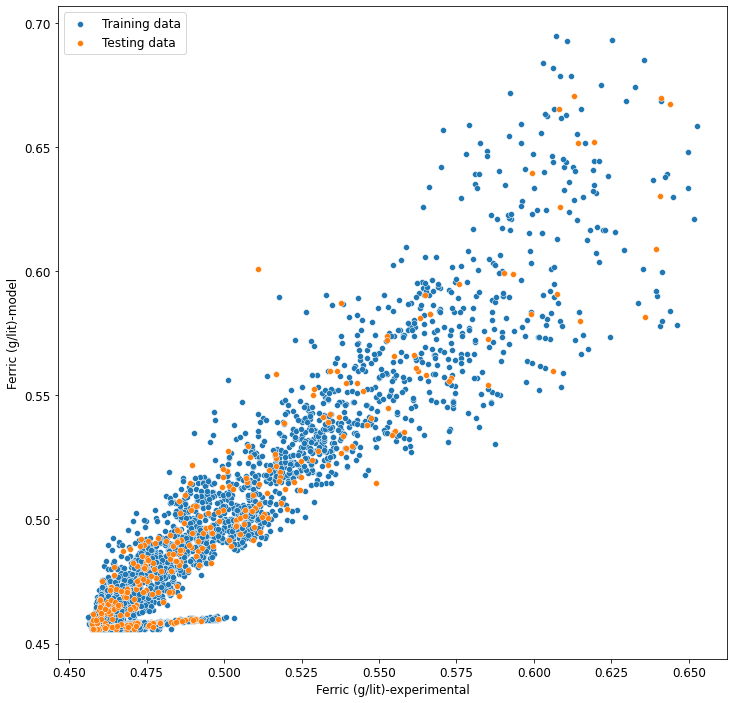

In [103]:
plt.figure(figsize=(12,12))
d=sns.scatterplot(x=ytr, y=y, legend='auto')
d=sns.scatterplot(x=yte, y=y_te,legend='auto')
d.legend(labels=["Training data","Testing data"],fontsize=12)
d.set(xlabel='Ferric concentration-exp', ylabel='Ferric concentration-model')
d.tick_params(labelsize=12)
d.set_xlabel('Ferric concentration-experimental',fontsize=12)
d.set_ylabel('Ferric concentration-model',fontsize=12)